Naive Bayes Classification

Binary Classification

1. Import Library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

2. Load Dataset

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


3. Data Split

In [ ]:
X=df.iloc[:, [2,3]].values

y=df.iloc[:, -1].values

In [ ]:
print('X : \n', X[ :5])
print('\ny : \n', y[:5])

X : 
 [[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]

y : 
 [0 0 0 0 0]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(320, 2)
(320,)
(80, 2)
(80,)


4. Create classifier model

In [ ]:
classifier_model_binary = GaussianNB()
classifier_model_binary.fit(X_train, y_train)

GaussianNB()

5. Predict test data

In [ ]:
y_pred = classifier_model_binary.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
classifier_model_binary.predict_proba(X_test)

array([[0.89147043, 0.10852957],
       [0.84097849, 0.15902151],
       [0.85177346, 0.14822654],
       [0.91910807, 0.08089193],
       [0.89836193, 0.10163807],
       [0.95434022, 0.04565978],
       [0.90414431, 0.09585569],
       [0.03556946, 0.96443054],
       [0.98918806, 0.01081194],
       [0.50281633, 0.49718367],
       [0.95249262, 0.04750738],
       [0.96371556, 0.03628444],
       [0.85930139, 0.14069861],
       [0.7299999 , 0.2700001 ],
       [0.97431305, 0.02568695],
       [0.47994231, 0.52005769],
       [0.79297558, 0.20702442],
       [0.97847631, 0.02152369],
       [0.00422727, 0.99577273],
       [0.86019336, 0.13980664],
       [0.89871448, 0.10128552],
       [0.00500754, 0.99499246],
       [0.75594755, 0.24405245],
       [0.13376637, 0.86623363],
       [0.97909645, 0.02090355],
       [0.0047035 , 0.9952965 ],
       [0.9182418 , 0.0817582 ],
       [0.92764915, 0.07235085],
       [0.84823267, 0.15176733],
       [0.86172083, 0.13827917],
       [0.

In [ ]:
def predict_one(age, salary):
  print('Prediction : ', classifier_model_binary.predict([[age, salary]]))
  print('Probability : ', classifier_model_binary.predict_proba([[age, salary]]))

In [ ]:
predict_one(30, 87000)

Prediction :  [0]
Probability :  [[0.89147043 0.10852957]]


In [ ]:
predict_one(18, 210000)

Prediction :  [1]
Probability :  [[3.38648471e-05 9.99966135e-01]]


6. Evaluate

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[56,  2],
       [ 4, 18]])

In [ ]:
print(classification_report(y_test,y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.90      0.82      0.86        22

    accuracy                           0.93        80
   macro avg       0.92      0.89      0.90        80
weighted avg       0.92      0.93      0.92        80



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


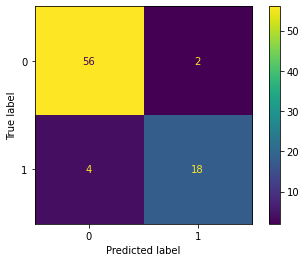

In [ ]:
import matplotlib.pyplot as plt
plot_confusion_matrix(classifier_model_binary, X_test, y_test)
plt.show()

Multiclass Classification

2. Load Dataset

In [ ]:
df_train = pd.read_excel('/content/data_train.xlsx')
df_test = pd.read_csv('/content/data_test.csv')

In [ ]:
df_train.head()

,Jurusan,Matematika,Bahasa Inggris,Bahasa Indonesia,Prestasi Siswa,Prestasi Sekolah
0,Matematika,92,86,88,1,1
1,Matematika,90,86,85,1,2
2,Sastra Inggris,82,87,92,2,1
3,Matematika,93,82,85,1,1
4,Sastra Inggris,86,85,88,1,1


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Jurusan           11 non-null     object
 1   Matematika        11 non-null     int64 
 2   Bahasa Inggris    11 non-null     int64 
 3   Bahasa Indonesia  11 non-null     int64 
 4   Prestasi Siswa    11 non-null     int64 
 5   Prestasi Sekolah  11 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 656.0+ bytes


In [ ]:
df_test.head()

,Jurusan,Matematika,Bahasa Inggris,Bahasa Indonesia,Prestasi Siswa,Prestasi Sekolah
0,Matematika,92,82,85,1,1
1,Matematika,91,83,85,2,2
2,Sastra Inggris,82,80,88,1,1
3,Sastra Indonesia,88,80,90,2,1
4,Sastra Inggris,83,85,84,2,1


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Jurusan           6 non-null      object
 1   Matematika        6 non-null      int64 
 2   Bahasa Inggris    6 non-null      int64 
 3   Bahasa Indonesia  6 non-null      int64 
 4   Prestasi Siswa    6 non-null      int64 
 5   Prestasi Sekolah  6 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 416.0+ bytes


Data Split

test

In [ ]:
X_train=df_train.iloc[:, [1, 2,3,4,5]].values

y_train=df_train.iloc[:, 0].values

In [ ]:
X_test=df_test.iloc[:, [1, 2,3,4,5]].values

y_test=df_test.iloc[:, 0].values

In [ ]:
print('X : \n', X_test[ :5])
print('\ny : \n', y_test[:5])

X : 
 [[92 82 85  1  1]
 [91 83 85  2  2]
 [82 80 88  1  1]
 [88 80 90  2  1]
 [83 85 84  2  1]]

y : 
 ['Matematika' 'Matematika' 'Sastra Inggris' 'Sastra Indonesia'
 'Sastra Inggris']


In [ ]:
classifier_test = GaussianNB()
classifier_test.fit(X_train, y_train)

GaussianNB()

In [ ]:
classifier_test.predict_proba(X_test)

array([[9.84514205e-01, 1.54850655e-02, 7.29022414e-07],
       [9.99987686e-01, 0.00000000e+00, 1.23143756e-05],
       [2.29659067e-20, 9.99999810e-01, 1.90218794e-07],
       [2.13516750e-09, 9.99999996e-01, 1.89843957e-09],
       [2.44441357e-13, 6.49045316e-06, 9.99993510e-01],
       [1.39716921e-06, 9.99998424e-01, 1.78428054e-07]])

In [ ]:
print(classification_report(y_test,y_pred, zero_division=0))

                  precision    recall  f1-score   support

      Matematika       1.00      1.00      1.00         2
Sastra Indonesia       0.67      1.00      0.80         2
  Sastra Inggris       1.00      0.50      0.67         2

        accuracy                           0.83         6
       macro avg       0.89      0.83      0.82         6
    weighted avg       0.89      0.83      0.82         6



In [ ]:
predict_one(90, 86, 85, 1, 2)

Prediction :  [1]
Probability :  [[1. 0.]]


In [ ]:
predict_one(82,87,92,2,1)

Prediction :  [1]
Probability :  [[1. 0.]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


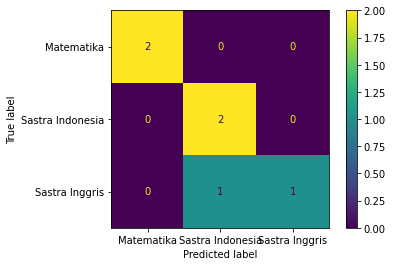

In [ ]:
import matplotlib.pyplot as plt
plot_confusion_matrix(classifier_test, X_test, y_test)
plt.show()